In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Check out some basic information about the dataset

In [4]:
# Number of instances
print('Number of instances in training set:\t {}'.format(train.shape[0]))
print('Number of instances in test set:\t {}'.format(test.shape[0]))

Number of instances in training set:	 10886
Number of instances in test set:	 6493


In [5]:
# Attributes
print('train.dtypes: \n{}'.format(train.dtypes))
print('\n')
print('test.dtypes: \n{}'.format(test.dtypes))

train.dtypes: 
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


test.dtypes: 
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


Attributes "casual" and "registered" are not presented in the test set, so they will be droped.

The original attributes for prediction are: datetime, season, holiday, workingday, weather, temp, atemp, humidity, and windspeed.

### Check out missing datas

In [6]:
print('Number of missing data in training set:\t{}'.format(train.isnull().sum().sum()))
print('Number of missing data in test set:\t{}'.format(test.isnull().sum().sum()))

Number of missing data in training set:	0
Number of missing data in test set:	0


### The distribution of the target "count"

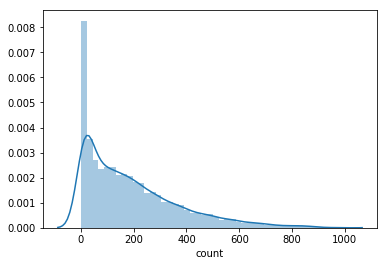

In [7]:
sns.distplot(train['count'])

This competition is rated on the root mean squared logarithmic error, so we do a log transformation on the target

In [8]:
train['count'] = np.log1p(train['count'])

### The distribution of the log transformed target

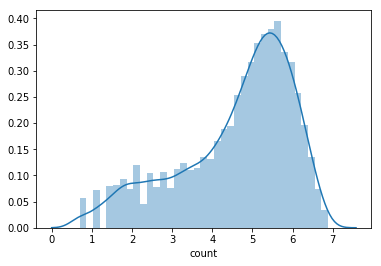

In [9]:
sns.distplot(train['count'])

Most of the target fall into 4 ~ 6

### Check out the attributes individually

In [10]:
# Drop the useless attributes

train = train.drop(['casual', 'registered'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.693147


In [11]:
# turn the "datetime" attribute to pandas datetime type

train['datetime'] = pd.to_datetime(train['datetime'])

In [12]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
dtype: object

In [13]:
# create attributes for year, month, day... and drop the original datetime attribute

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

train = train.drop('datetime', axis=1)

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,4


In [14]:
def plot_category(feat, scale='area', hue=None):
    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    sns.countplot(data=train, x=feat, hue=hue)
    plt.subplot(1, 3, 2)
    sns.boxplot(data=train, x=feat, y='count', hue=hue)
    plt.subplot(1, 3, 3)
    sns.violinplot(data=train, x=feat, y='count', scale=scale, hue=hue)
    plt.show()

In [15]:
def plot_numerical(feat1, feat2=None, logx=False):
    if logx:
        plt.figure(figsize=(16, 12))
        plt.subplot(2, 2, 1)
        sns.distplot(train[feat1])
        plt.subplot(2, 2, 2)
        sns.distplot(np.log1p(train[feat1]))
        plt.xlabel('log({})'.format(feat1))
        plt.subplot(2, 2, 3)
        sns.regplot(data=train, x=feat1, y=feat2, scatter_kws={'s': 3, 'alpha': 0.6})
        plt.subplot(2, 2, 4)
        sns.regplot(data=train, x=feat1, y=feat2, logx=True, scatter_kws={'s': 3, 'alpha': 0.6})
        plt.show()
        return
    else:
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.distplot(train[feat1])
        plt.subplot(1, 2, 2)
        sns.regplot(data=train, x=feat1, y=feat2, scatter_kws={'s': 3, 'alpha': 0.6})
        plt.show()
        return

#### season

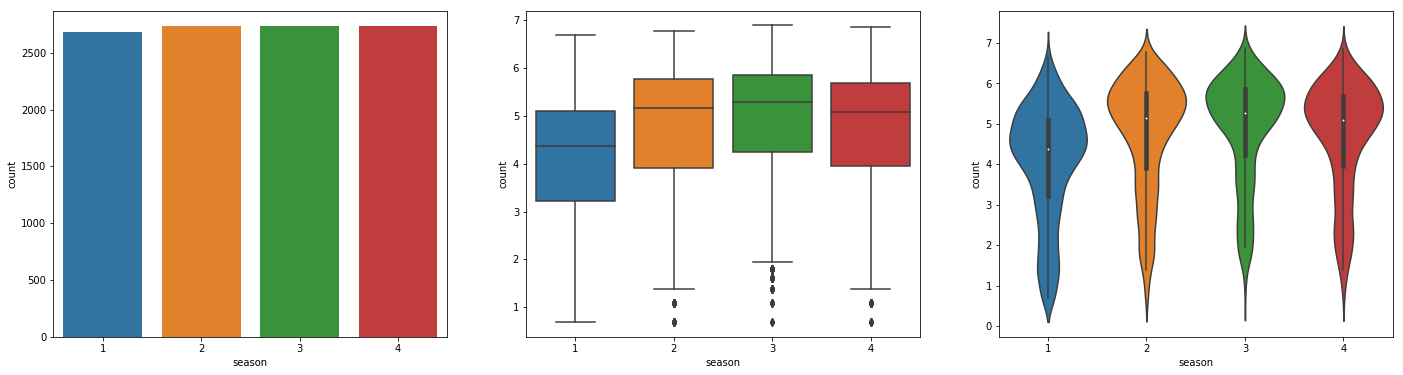

In [16]:
plot_category('season', scale='count')

The target distributed similarly across four seasons, but season 1 and 4 got lower mean and median value.

#### holiday

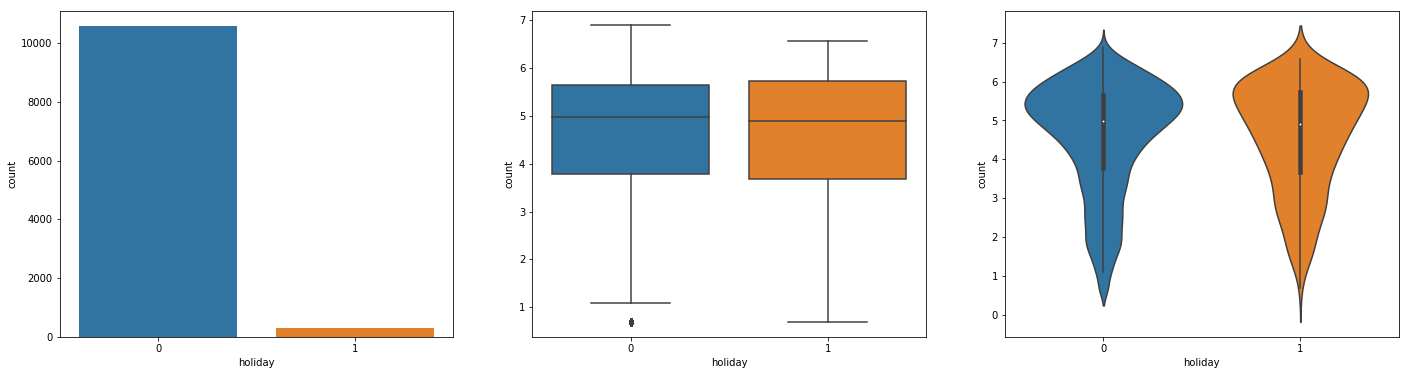

In [17]:
plot_category('holiday')

Number of holidays are significantly higher than non-holidays, target tend to be higher in non-holidays.

#### working_day

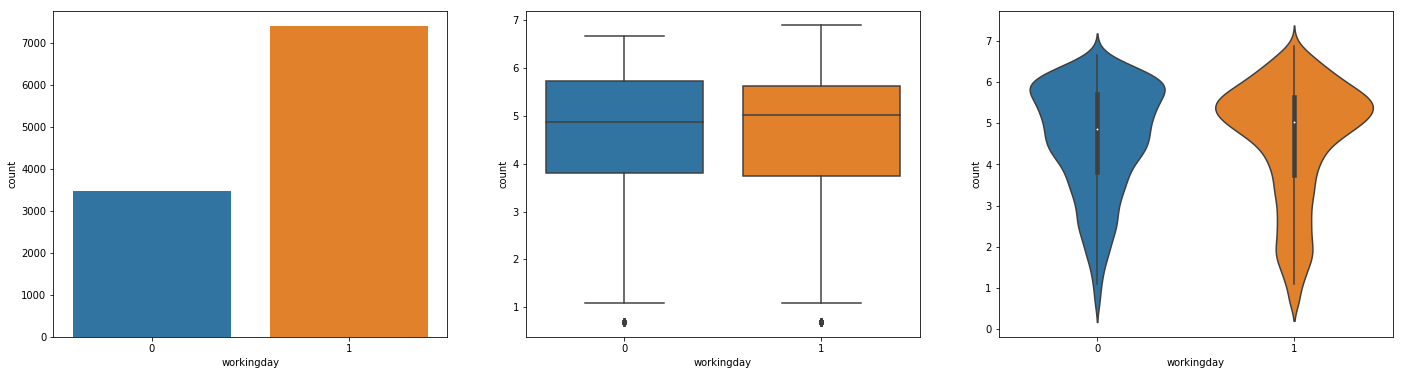

In [18]:
plot_category('workingday')

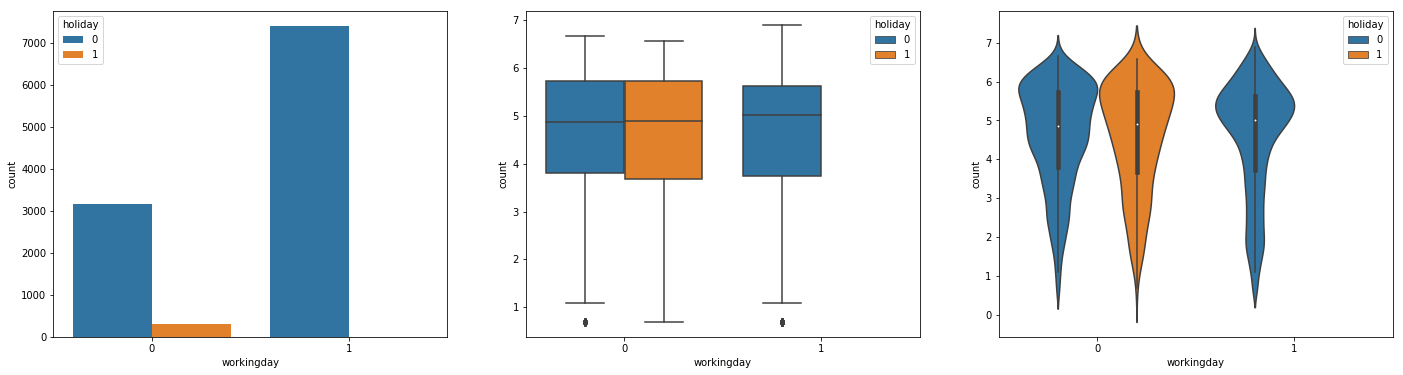

In [19]:
plot_category('workingday', hue='holiday')

Number of workingdays are significantly higher than non-workingdays, target tend to be higher in workingday.

There are some holidays in non-workingdays, but there are no holidays in workingdays, which may be the reason why non-workingdays got lower target values.

To sum up, people may use the bike to go to work, so when they need to work, the target gets higher.

### weather

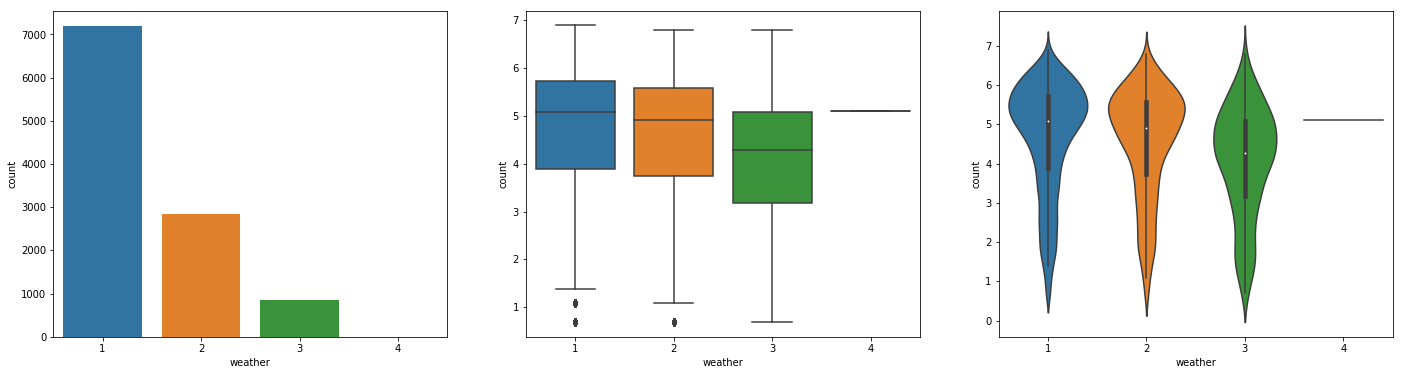

In [20]:
plot_category('weather')

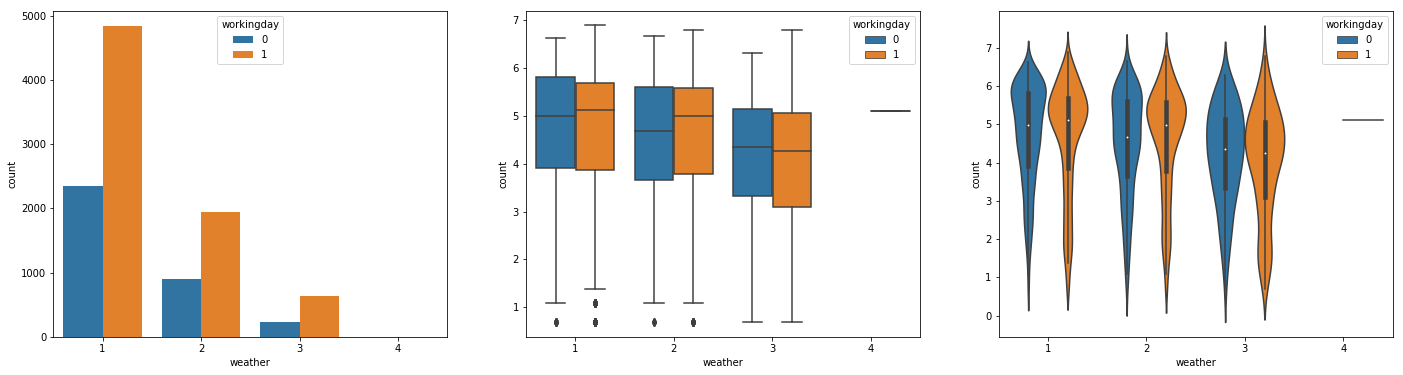

In [21]:
plot_category('weather', hue='workingday')

Target seems to be lower on days with weather 3, and this is true for both working and non-working days.

There are so few instance with weather 4(just 1), that we can not draw any conclusion about it.

#### temp

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


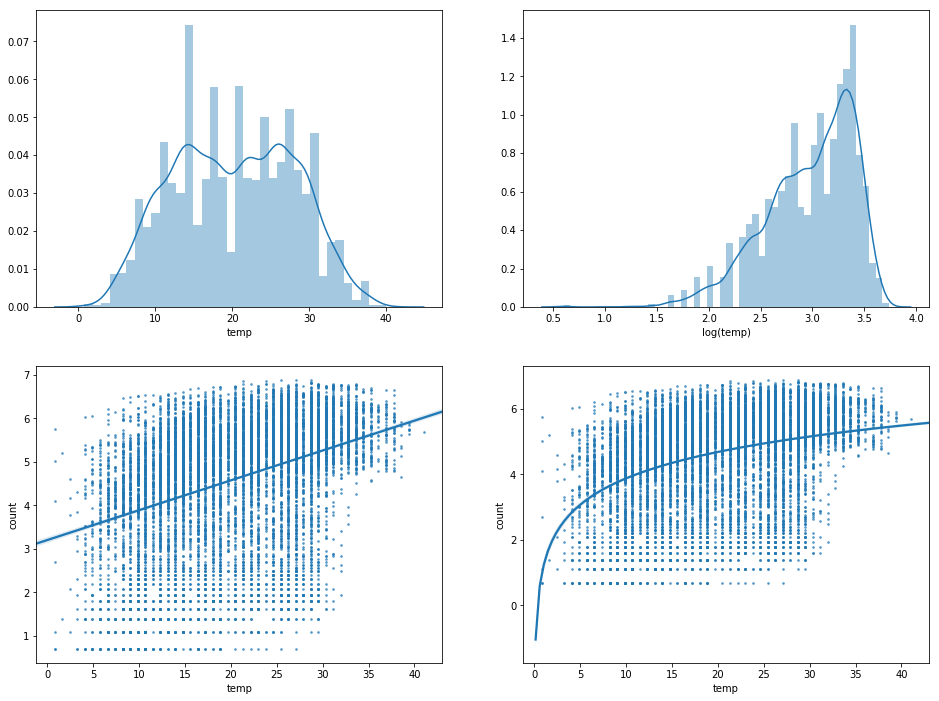

In [22]:
plot_numerical('temp', 'count', logx=True)

Target seems to have a linear correlation with the logarithm of temp

#### atemp

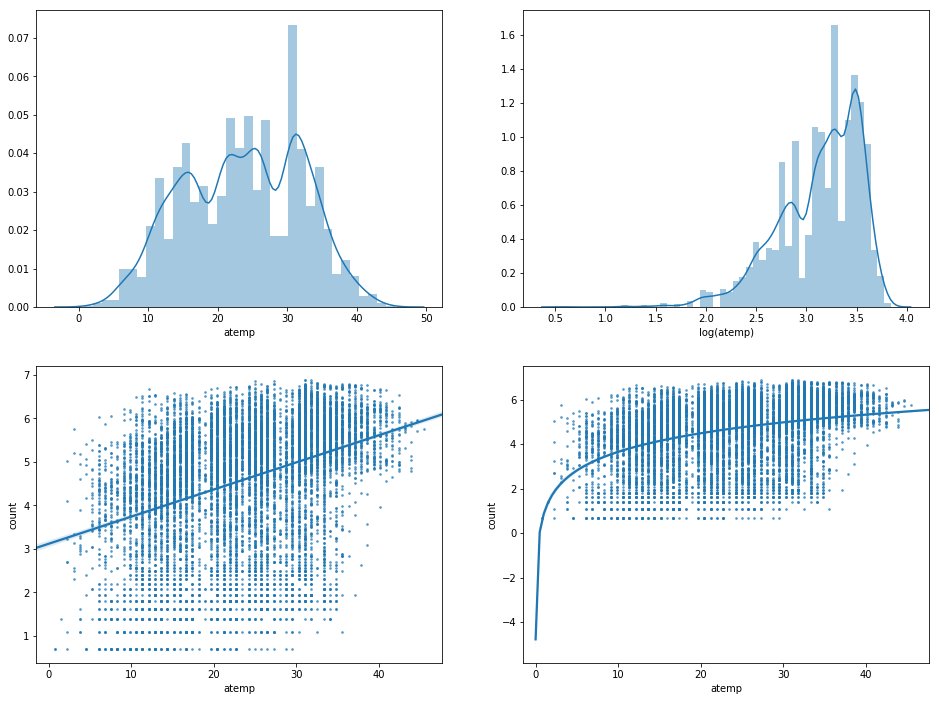

In [23]:
plot_numerical('atemp', 'count', logx=True)

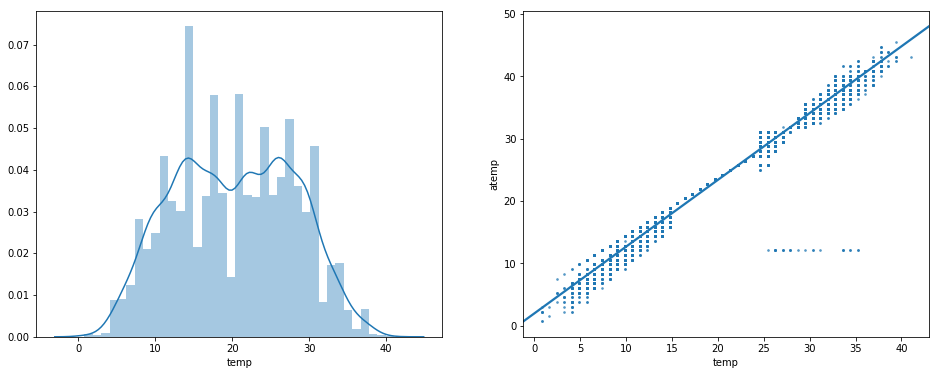

In [24]:
plot_numerical('temp', 'atemp')

Atemp seems to have a similar relationship with the target, and atemp and temp seems to be closely related.

Although there are some points where temp and atemp are quite different.

**Let's filter these data points out and see what heapens**

In [25]:
train[(train['temp']>20)&(train['atemp']<15)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
8991,3,0,1,1,27.88,12.12,57,11.0014,4.488636,2012,8,17,0
8992,3,0,1,1,27.06,12.12,65,7.0015,4.007333,2012,8,17,1
8993,3,0,1,1,27.06,12.12,61,8.9981,2.995732,2012,8,17,2
8994,3,0,1,1,26.24,12.12,65,7.0015,1.945910,2012,8,17,3
8995,3,0,1,1,26.24,12.12,73,11.0014,2.302585,2012,8,17,4
8996,3,0,1,1,26.24,12.12,73,7.0015,3.610918,2012,8,17,5
8997,3,0,1,1,25.42,12.12,78,8.9981,5.062595,2012,8,17,6
8998,3,0,1,1,26.24,12.12,73,7.0015,5.940171,2012,8,17,7
8999,3,0,1,1,27.88,12.12,65,8.9981,6.505784,2012,8,17,8
9000,3,0,1,1,28.70,12.12,58,7.0015,5.937536,2012,8,17,9


Turns out, these data points are all in the same day (24 points in total), for some reason, this day's atemp has all been filled with 12.12.

These noise data should be removed before modeling.

To remove them, we can either throw away the attribute "atemp", or we can throw away all these instances.

Since temp and atemp got basically the same information, we will throw away "atemp".

#### humidity

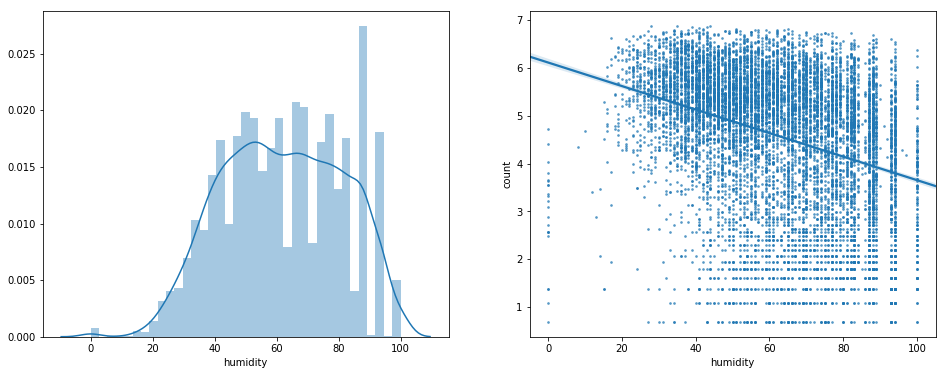

In [26]:
plot_numerical('humidity', 'count')

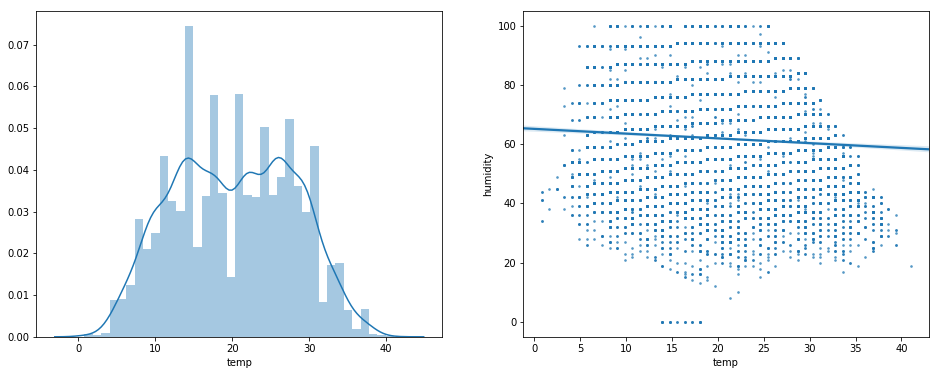

In [27]:
plot_numerical('temp', 'humidity')

Humidity seems to have a negative impact on the target, and it is not very related to temp.

#### windspeed

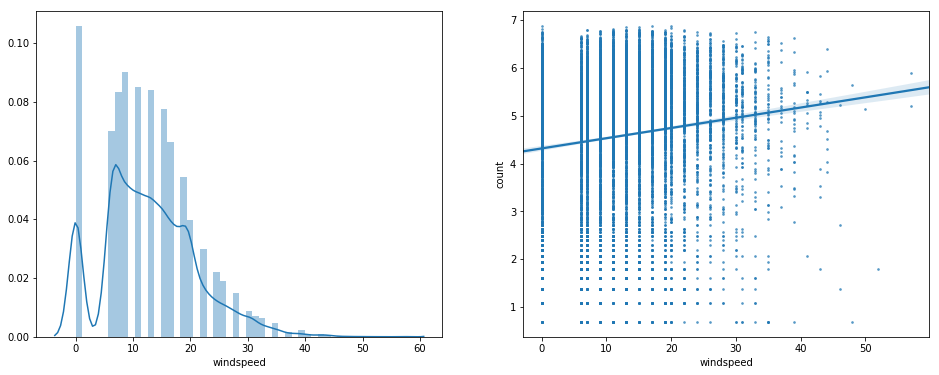

In [28]:
plot_numerical('windspeed', 'count')

Windspeed seems to be positively related with the target.

#### year

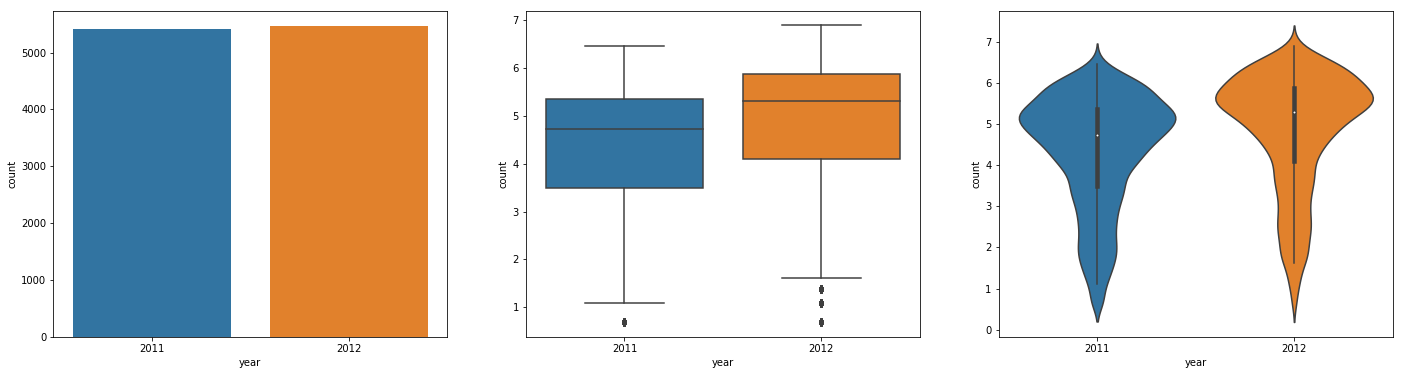

In [31]:
plot_category('year', scale='count')

The distributation of count in 2012 tend to be higher than 2011

#### month

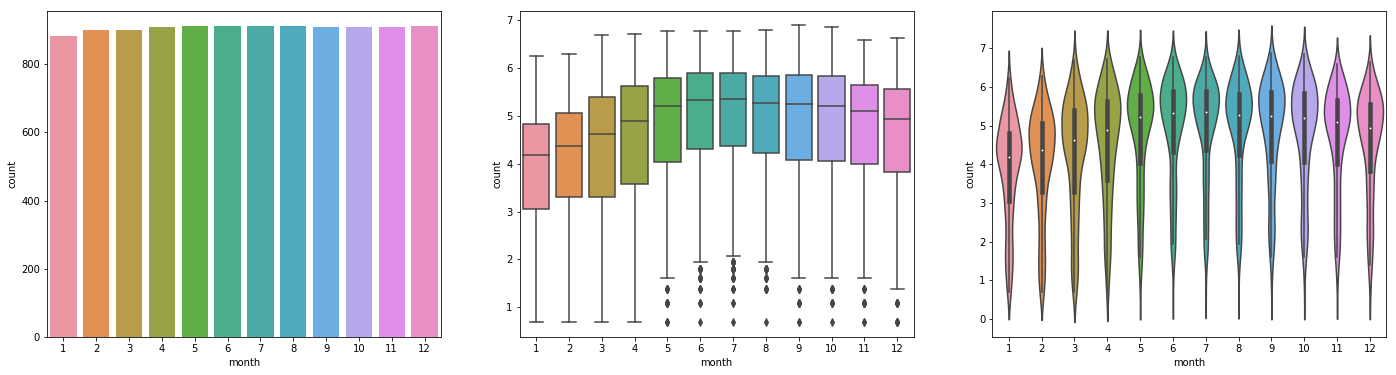

In [32]:
plot_category('month', scale='count')

target tend to be higher in month 6-10

#### day

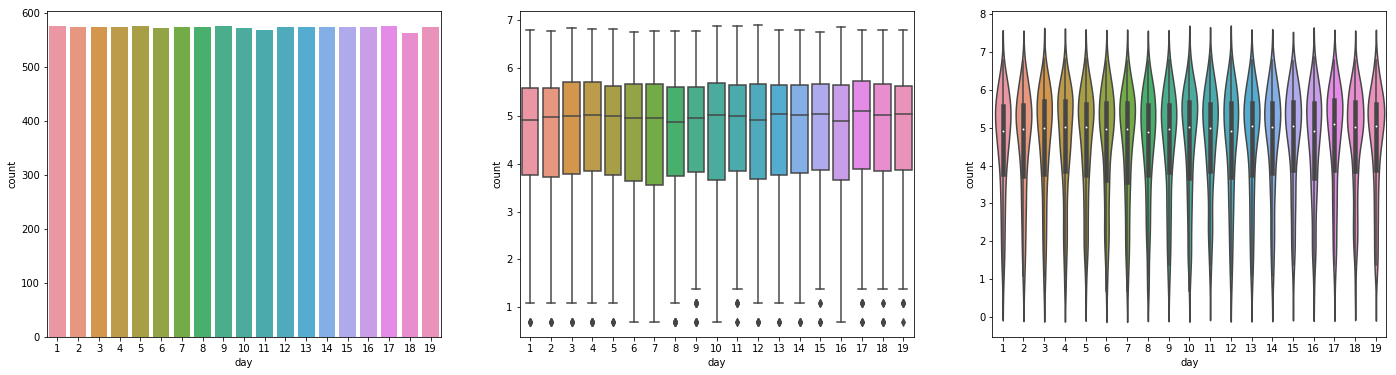

In [33]:
plot_category('day')

day does not seem to have any relationship with the target

#### hour

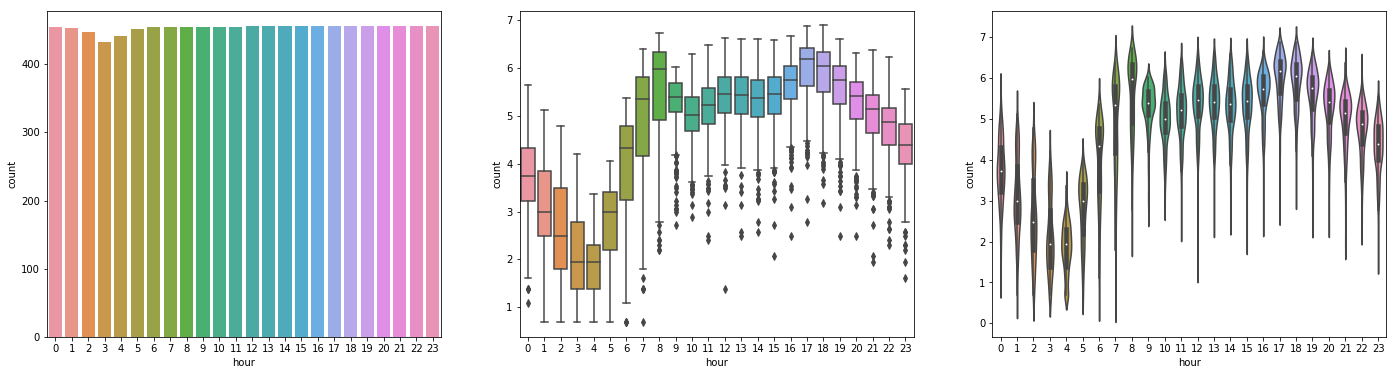

In [34]:
plot_category('hour')

target gets much lower in the night